```
# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)
```

(hatching-uncertainty)=
# Calculation and hatching of the uncertainty in projected delta changes.

08/07/2021

**M. Iturbide** (Santander Meteorology Group. Institute of Physics of Cantabria, CSIC-UC, Santander, Spain).

This notebook is an example of calculation and visualization of the AR6-WGI uncertainty methods (simple and advanced) for projected delta changes. Please refer to the AR6 WGI Cross-Chapter Box Atlas 1 for more information. 

Example data available at [auxiliary-material](auxiliary-material) is used. The base hatching R-functions are defined in {download}`datasets-interactive-atlas/hatching-functions/hatching-functions.R<../datasets-interactive-atlas/hatching-functions/hatching-functions.R>`. 

Two main sections in this notebook provide two ways of creating hatched maps:
 * (A) An **easy one-step way** to create maps including uncertainty information 
 * (B) An **explicit step-by-step way** to illustrate the inner workings of including uncertainty information 
 


### Load libraries and functions

We will use the following climate4R libraries:
 * `loadeR` to load data ({cite:authorpar}`RbasedClimate4ROpen`)
 * `visualizeR` for data visualization ({cite:authorpar}`RbasedClimate4ROpen`)
 
We will also need:
 * `sp` to work with spatial data ({cite:authorpar}`pebesmaRnews2005`)

In [ ]:
library(loadeR)
library(visualizeR)
library(sp)

The base **hatching R-functions** are defined in *datasets-interactive-atlas/hatching-functions/hatching-functions.R*. Additionally, a wrapper function applying the previous is also available in *datasets-interactive-atlas/hatching-functions/AR6-WGI-hatching.R*. To load the functions in the working environment use the `source` R base function as follows.

In [2]:
source("../datasets-interactive-atlas/hatching-functions/hatching-functions.R")
source("../datasets-interactive-atlas/hatching-functions/AR6-WGI-hatching.R")

The scripts are available for download:
* {download}`hatching-functions.R<../datasets-interactive-atlas/hatching-functions/hatching-functions.R>`

* {download}`AR6-WGI-hatching.R<../datasets-interactive-atlas/hatching-functions/AR6-WGI-hatching.R>`

### (A) Easy one-step way to create maps including uncertainty information 

This one-step way uses the `AR6.WGI.hatching` function. It requires one or two data objects; the delta change and, if the advanced method is chosen, also the historical reference.

The **data used in this section** is available under the '''sh notebooks/auxiliary-material ''' folder. There are two NetCDFs of CMIP6 JJA (June-July-August) data for South America, containing the SSP5-8.5 precipitation delta change for the long term (2081-2100 w.r.t baseline 1995-2014) and annual JJA precipitation data for the historical pre-industrial reference 1850-1900, respectively.

You can use the `dataInventory` function from `loadeR` to check basic data information, e.g.:

In [3]:
di <- dataInventory("auxiliary-material/CMIP6_SAM_historical_JJA_pr_1850-1900_annual.nc")
str(di)

[2021-08-08 07:31:49] Doing inventory ...

[2021-08-08 07:31:50] Retrieving info for 'pr' (0 vars remaining)

[2021-08-08 07:31:51] Done.



List of 1
 $ pr:List of 7
  ..$ Description: chr "Precipitation"
  ..$ DataType   : chr "float"
  ..$ Shape      : int [1:4] 51 33 69 50
  ..$ Units      : chr "mm"
  ..$ DataSizeMb : num 23.2
  ..$ Version    : logi NA
  ..$ Dimensions :List of 4
  .. ..$ member:List of 3
  .. .. ..$ Type  : chr "Ensemble"
  .. .. ..$ Units : chr ""
  .. .. ..$ Values: chr [1:33] "ACCESS-CM2_r1i1p1f1" "ACCESS-ESM1-5_r1i1p1f1" "BCC-CSM2-MR_r1i1p1f1" "CAMS-CSM1-0_r2i1p1f1" ...
  .. ..$ time  :List of 4
  .. .. ..$ Type      : chr "Time"
  .. .. ..$ TimeStep  : chr "365.24 days"
  .. .. ..$ Units     : chr "days since 1850-06-01 12:00:00 GMT"
  .. .. ..$ Date_range: chr "1850-06-01T12:00:00Z - 1900-06-01T12:00:00Z"
  .. ..$ lat   :List of 5
  .. .. ..$ Type       : chr "Lat"
  .. .. ..$ Units      : chr "degrees_north"
  .. .. ..$ Values     : num [1:69] -56.5 -55.5 -54.5 -53.5 -52.5 -51.5 -50.5 -49.5 -48.5 -47.5 ...
  .. .. ..$ Shape      : int 69
  .. .. ..$ Coordinates: chr "lat"
  .. ..$ lon   :List 

Note that there are 33 CMIP6 models ("member" dimension). 

These data can be loaded into variables using `loadGridData`.

In [ ]:
ref <- loadGridData("auxiliary-material/CMIP6_SAM_historical_JJA_pr_1850-1900_annual.nc", var = "pr")
delta <- loadGridData("auxiliary-material/CMIP6_SAM_ssp585_JJA_pr_2081-2100_delta.nc", var = "pr")

We only need to apply the `AR6.WGI.hatching` function, which includes the `method` parameter to select the uncertainty method. For instance, in the next example the simple method is selected (`method = simple`), which is based on model agreement. Optionally, a list of additional parameters from the `map.hatching` function (package *visualizeR*) can be passed to argument `map.hatching.args` to control the appearance of the hatches, i.e. density, direction, color, ... (type `?map.hatching` for specific documentation). 

Finally, additional arguments from the `spatialPlot` function can be also included to control graphical parameters, such as the color theme (e.g. `color.theme = "BrBG"`). A list of color themes to use from `RColorBrewer` package can be obtained by issuing `RColorBrewer::display.brewer.all()`.


In [5]:
pl.simple.sam <- AR6.WGI.hatching(delta = delta, method = "simple", 
                                  map.hatching.args = list(density = 2, lwd = 1.2), 
                                  color.theme = "BrBG")


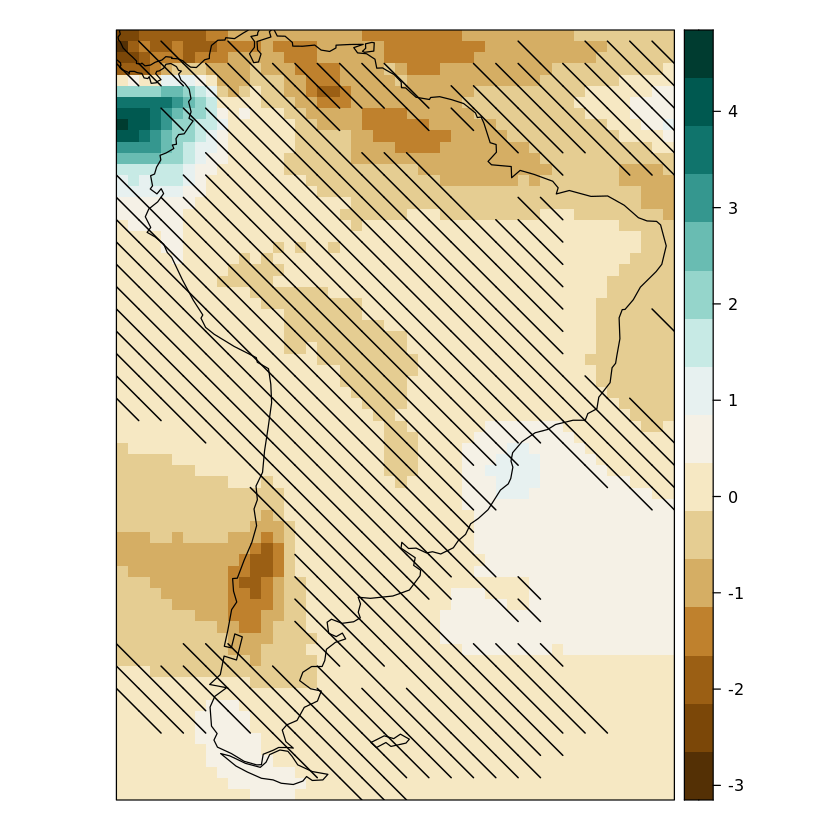

In [6]:
pl.simple.sam

To plot the relative delta, it needs to be explicitly provided. In this case, it is available in this repository as auxiliary material. Add more graphical parameters until the desired output is obtained. E.g. we can manually set the range of the color bar.

In [ ]:
rel.delta <- loadGridData("auxiliary-material/CMIP6_SAM_ssp585_JJA_pr_2081-2100_relative_delta.nc", var = "pr")
pl.simple.sam <- AR6.WGI.hatching(delta = delta, relative.delta = rel.delta, method = "simple", 
                                  map.hatching.args = list(density = 2, lwd = 1.2), 
                                  color.theme = "BrBG", set.max = 50, set.min = -50)

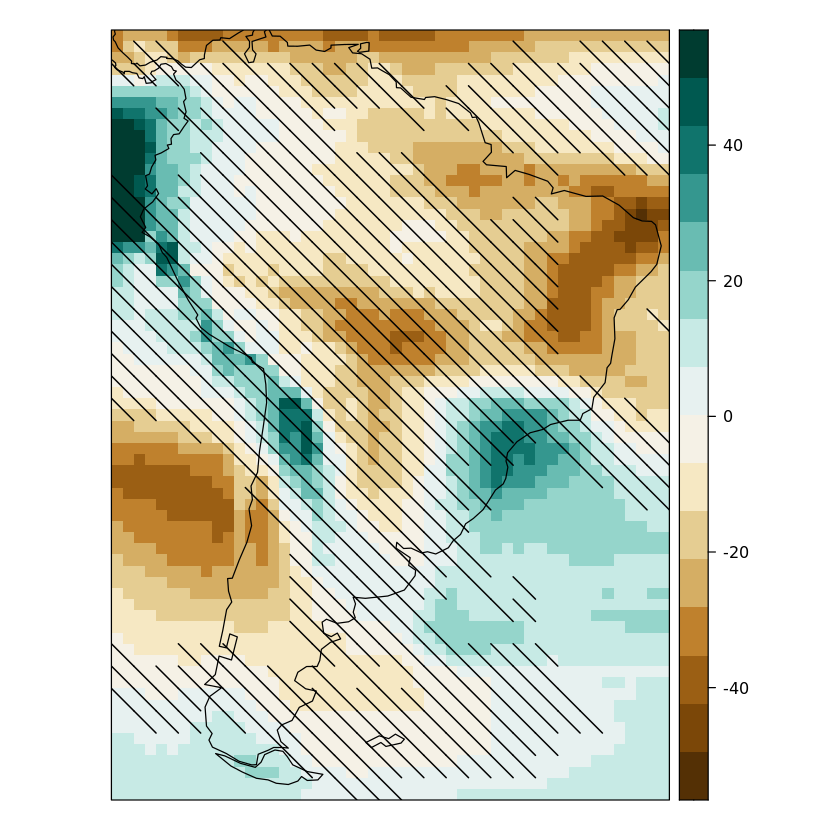

In [8]:
pl.simple.sam

We can change to the `advanced` method easily (`method = advanced`). The advanced method is based on the presence/absence of signal with respect to the interannual variability of a reference period (here pre-industrial, 1850-1900). This method has two components:

 * The areas with absence of signals are hatched
 * The areas with presence of signal but absence of model agreement are crossed.

In [9]:
pl.advanced.sam <- AR6.WGI.hatching(delta = delta, historical.ref = ref, relative.delta = rel.delta, method = "advanced", 
                                  map.hatching.args = list(density = 1, lwd = 0.7), 
                                  color.theme = "BrBG", set.max = 50, set.min = -50)

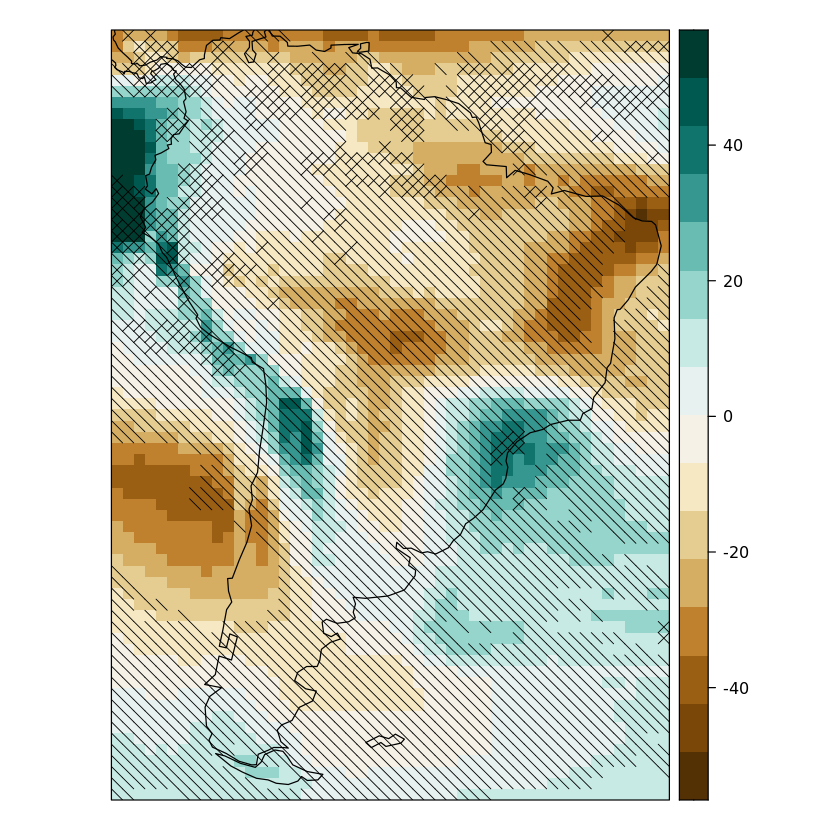

In [10]:
pl.advanced.sam

To export the map you can use the following code:

```r
pdf("mymap.pdf")
pl.advanced.sam
dev.off()
```

### (B) Explicit step-by-step illustration of the inner workings to include uncertainty information 

The data used in this section is global and it is available under the ´´´sh notebooks/auxiliary-material ´´´ folder. The data consists of two NetCDFs containing CMIP6 JJA historical and SSP5-8.5 precipitation climatologies for the 1986-2005 and 2081-2100 periods, respectively. 

Use the `dataInventory` function from `loadeR` to check basic data information:

In [ ]:
di <- dataInventory("auxiliary-material/CMIP6_historical_JJA_pr_1995-2014.nc")

Load the data into variables using `loadGridData`.

In [ ]:
hist <- loadGridData("auxiliary-material/CMIP6_historical_JJA_pr_1995-2014.nc", var = "pr")
scen <- loadGridData("auxiliary-material/CMIP6_ssp585_JJA_pr_2081-2100.nc", var = "pr")

#### Calculate delta change

Future delta changes are the arithmetic difference between future and historical time slice climatologies. Relative deltas can also be calculated with respect to the multi-model mean. 


In [ ]:
delta <- gridArithmetics(climatology(scen), climatology(hist), operator = "-")
ensemble.mean <- function(grid) aggregateGrid(grid, aggr.mem = list(FUN = mean, na.rm = T))
delta.ens <- ensemble.mean(delta)
hist.ens <- ensemble.mean(climatology(hist))
# Relative delta
rel.delta <- gridArithmetics(delta.ens, 
                             hist.ens, 
                             100, 
                             operator = c("/", "*"))

Check the output with a first visualization of the delta change for each member of the ensemble.

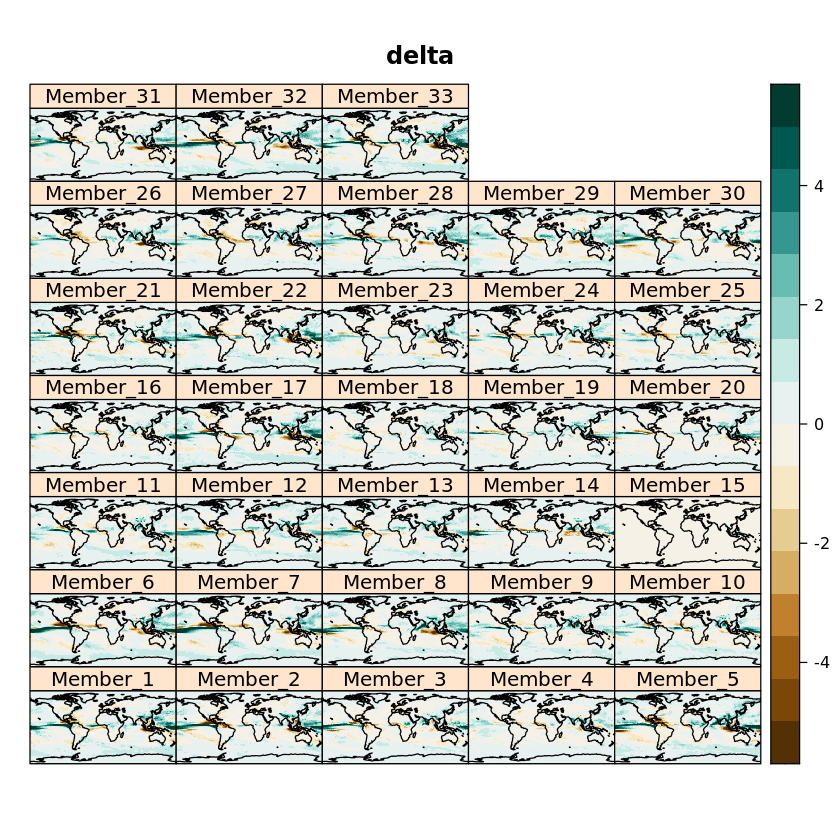

In [14]:
spatialPlot(delta, backdrop.theme = "coastline", main = "delta", 
           set.max = 5, set.min = -5, color.theme = "BrBG")

And this would be the relative delta change for the ensemble mean.

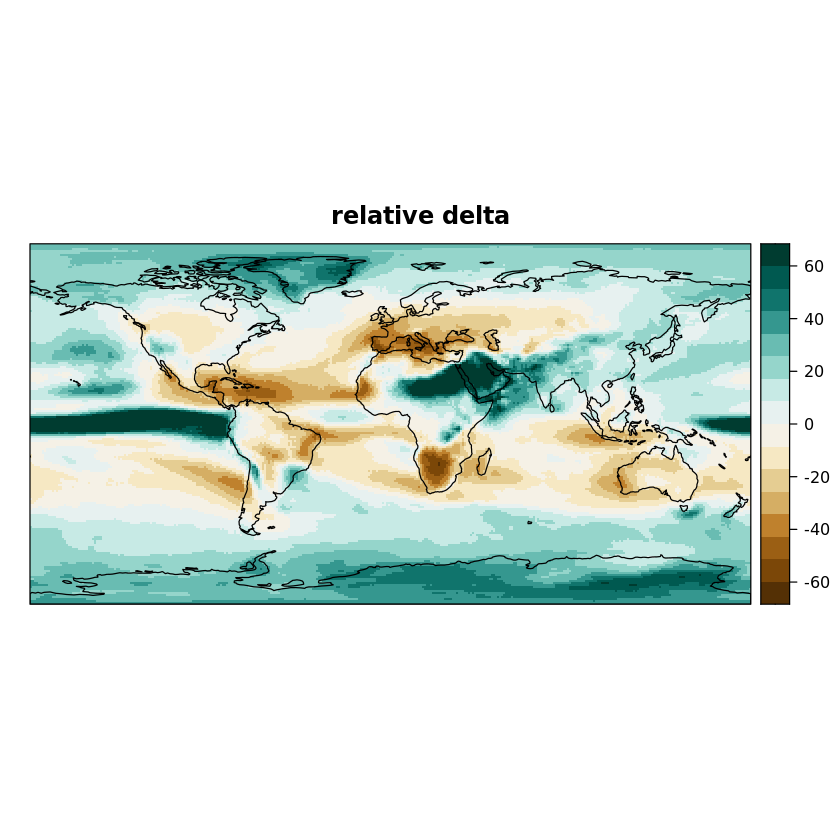

In [15]:
spatialPlot(rel.delta, backdrop.theme = "coastline", main = "relative delta", 
           set.max = 60, set.min = -60, color.theme = "BrBG")

 #### The "simple" uncertainty method

We compute now the simple uncertainty measure (`agreement` function) and check the result visually. Note that argument `th` allows to set the agreement threshold.

[2021-08-08 07:34:04] - Aggregating members...

[2021-08-08 07:34:05] - Done.



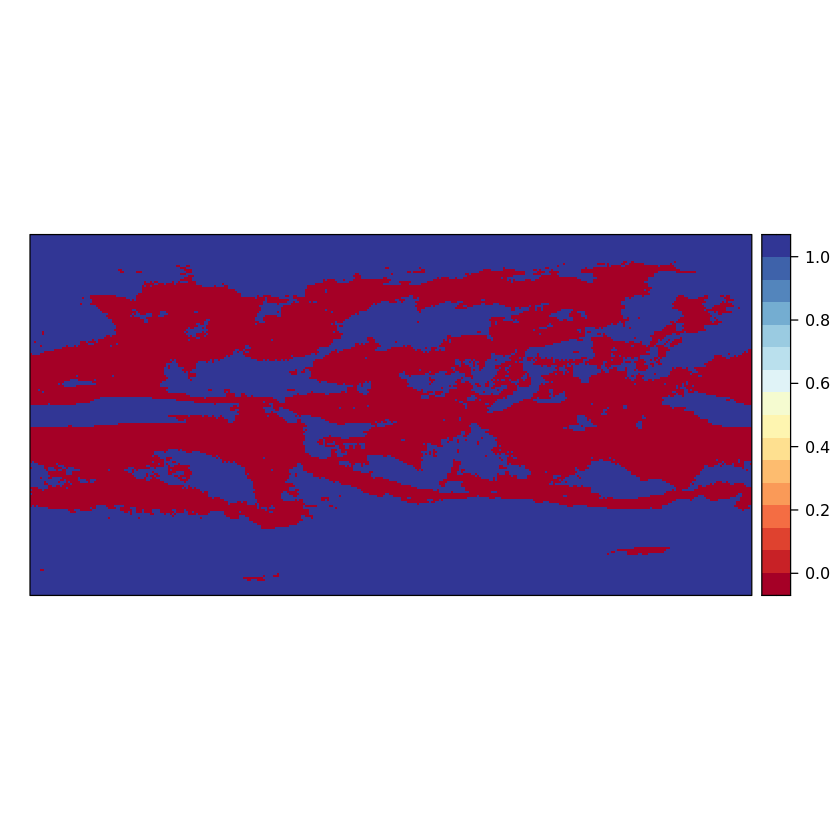

In [16]:
simple <- aggregateGrid(delta, aggr.mem = list(FUN = agreement, th = 80))
spatialPlot(simple)

This simple approach represents model agreement with two categories: 1 indicates high model agreement, where at least 80% of models agree on the sign of change; 0 indicates low model agreement, where fewer than 80% of models agree on sign of change. Note that model agreement is computed at a gridbox level and is not representative of regionally aggregated results over larger regions.

This binary mask can be used to create the spatial object of the hatches, which we will then overlay on the original plots, hatching the areas where there is not enough model agreement. Let's obtain the hatching and check visually.

[2021-08-08 07:34:06] - Computing climatology...

[2021-08-08 07:34:06] - Done.



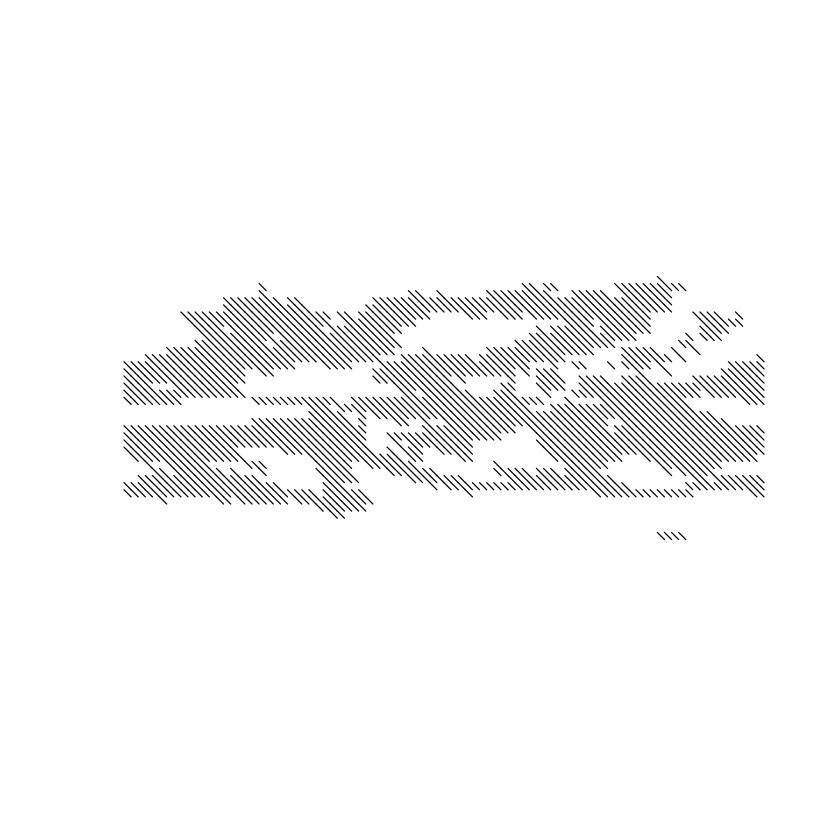

In [17]:
simple.hatch <- map.hatching(clim = climatology(simple), threshold = "0.5", angle = "-45",
                             condition = "LT", density = 4,  lwd = 0.6,
                             upscaling.aggr.fun = list(FUN = mean))
plot(simple.hatch[[2]])

We can overlay the hatching on the relative delta to produce the final figure (the hatches are passed to argument `sp.layout`)

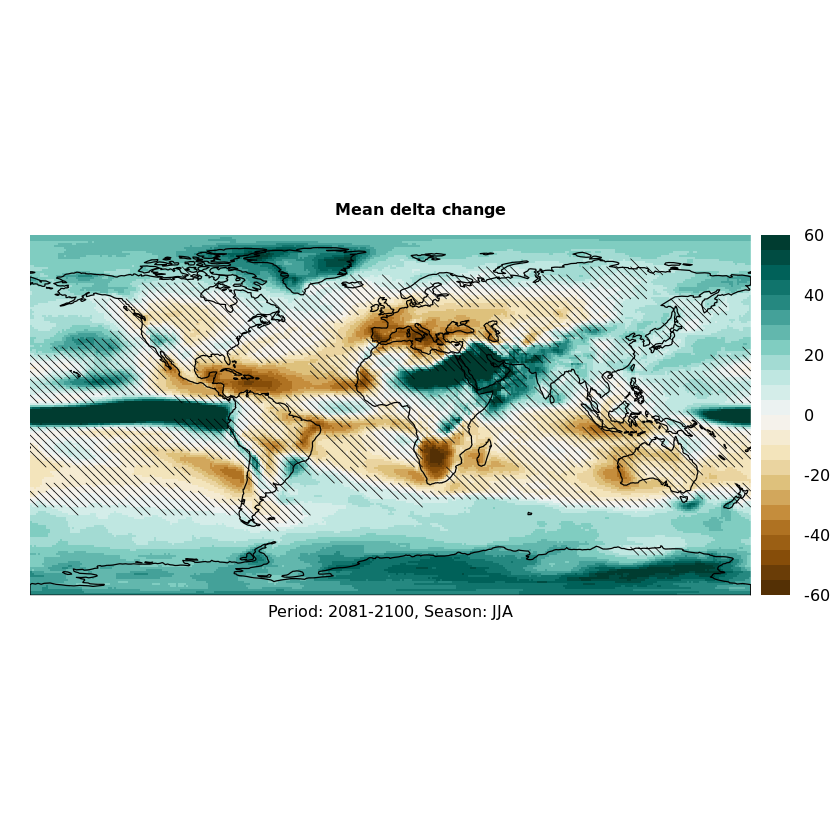

In [18]:
pl.simple <- spatialPlot(rel.delta, 
            color.theme = "BrBG", 
            at = seq(-60, 60, 5), 
            set.max = 60, set.min = -60,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list("Period: 2081-2100, Season: JJA", cex = 0.8),
            sp.layout = list(simple.hatch),
            par.settings = list(axis.line = list(col = 'transparent')))
pl.simple

 #### The "advanced" uncertainty method

The advanced method is based on the presence/absence of signal with respect to the interannual variability of a reference period (here 1850-1900). This method has two components:

 * The areas with absence of signal are hatched
 * The areas with presence of signal but absence of model agreement are crossed.
 
To calculate the signal we need the data of the delta change and anual data of the historical reference. Due to file size restrictions on GitHub we do not include the global historical reference. However it would be loaded as follows:

```R
ref <- loadGridData("auxiliary-material/CMIP6_historical_JJA_1850-1900_annual.nc", var = "pr")
```

Then we would calculate the signal as follows:

```R
sign <- signal(h = ref, d = delta)
```

This repository includes the pre-calculated grid of the signal, load it by executing the following cell.

In [ ]:
sign <- loadGridData("auxiliary-material/CMIP6_ssp585_JJA_pr_2081-2100_signal.nc", var = "pr_signal")

To obtain the overall signal of the ensemble we use the auxiliary functions `signal.ens1` and `signal.ens2`, which apply a threshold to the ensemble mean signal. 

In [ ]:
advanced1 <- aggregateGrid(sign, aggr.mem = list(FUN = signal.ens1, th = 66))

In [ ]:
advanced2.aux <- aggregateGrid(sign, aggr.mem = list(FUN = signal.ens2, th = 66))

`signal.ens1` returns the first component of the advanced method (where 0 = absence of signal), while `signal.ens2` returns an intermediate grid (where 0 = presence of signal) to calculate the second component in an additional step. 

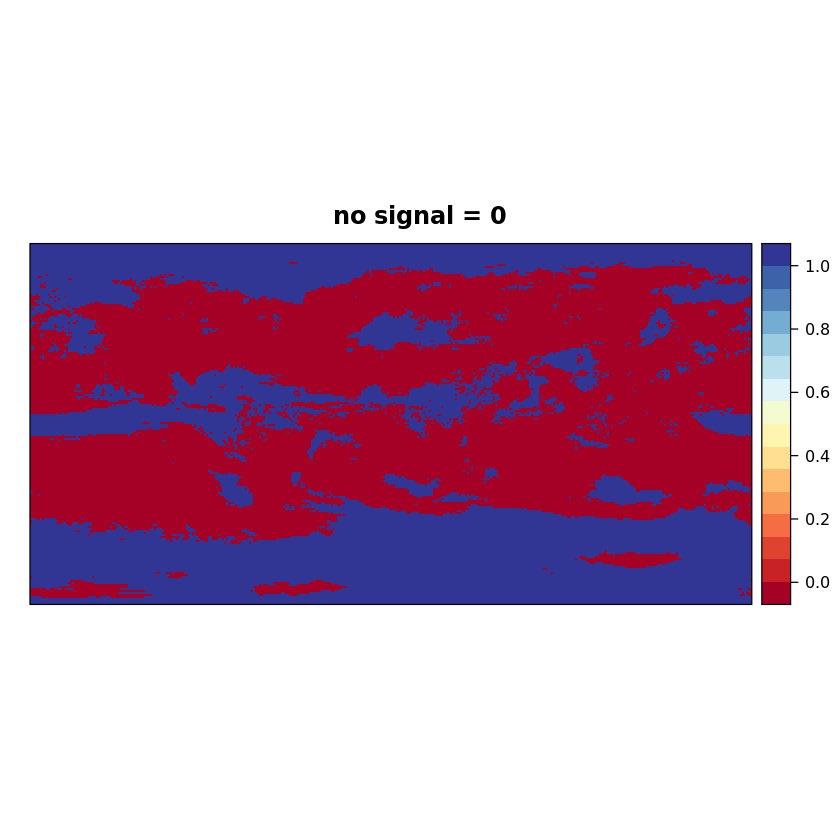

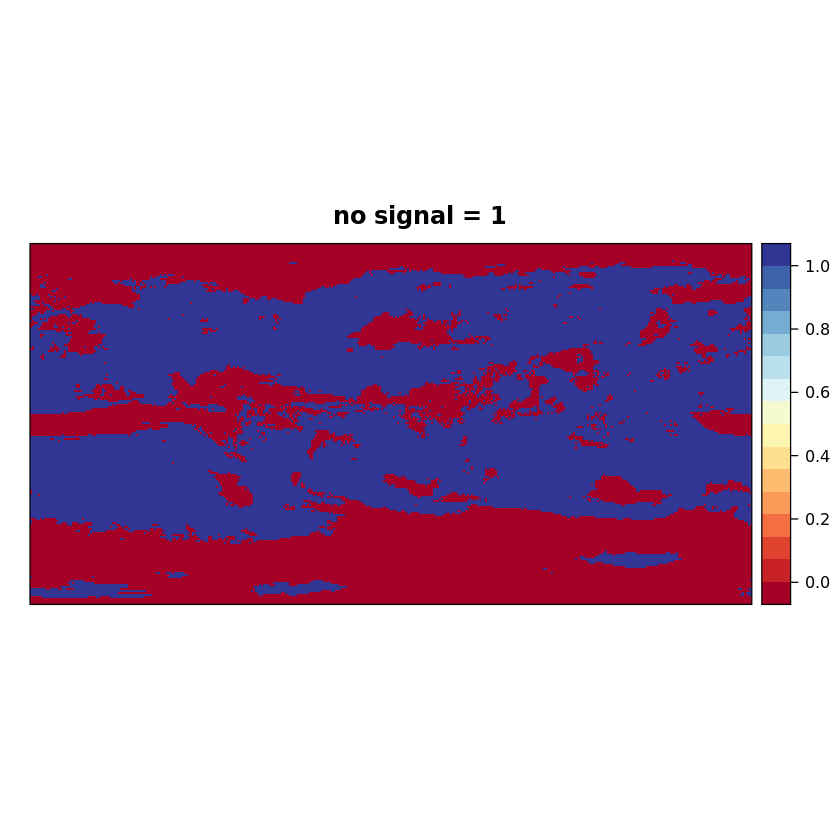

In [22]:
spatialPlot(advanced1, main = "no signal = 0")
spatialPlot(advanced2.aux, main = "no signal = 1")

The additional step consists on combining this map (`advanced2.aux`) with the map we obtained by the simple hatching approach (`simple`). As a result, we get a three-valued map.

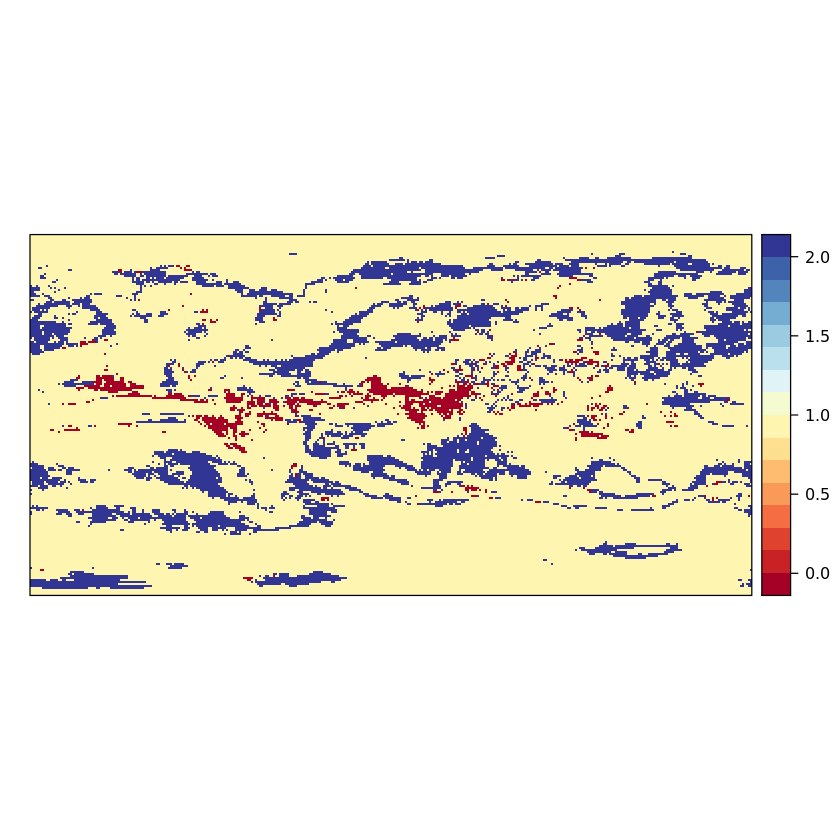

In [23]:
advanced2.aux <- gridArithmetics(advanced2.aux, simple, operator = "+") 
spatialPlot(advanced2.aux)

The different values arise from:

 * no signal (1) + agreement (1) = 2
 * no signal (1) + disagreement (0) = 1
 * signal (0) + agreement (1) = 1
 * signal (0) + disagreement (0) = 0
 
The second component of the advanced method hatches the forth outcome, i.e. the 0 value, where there is signal but there is no model agreement.

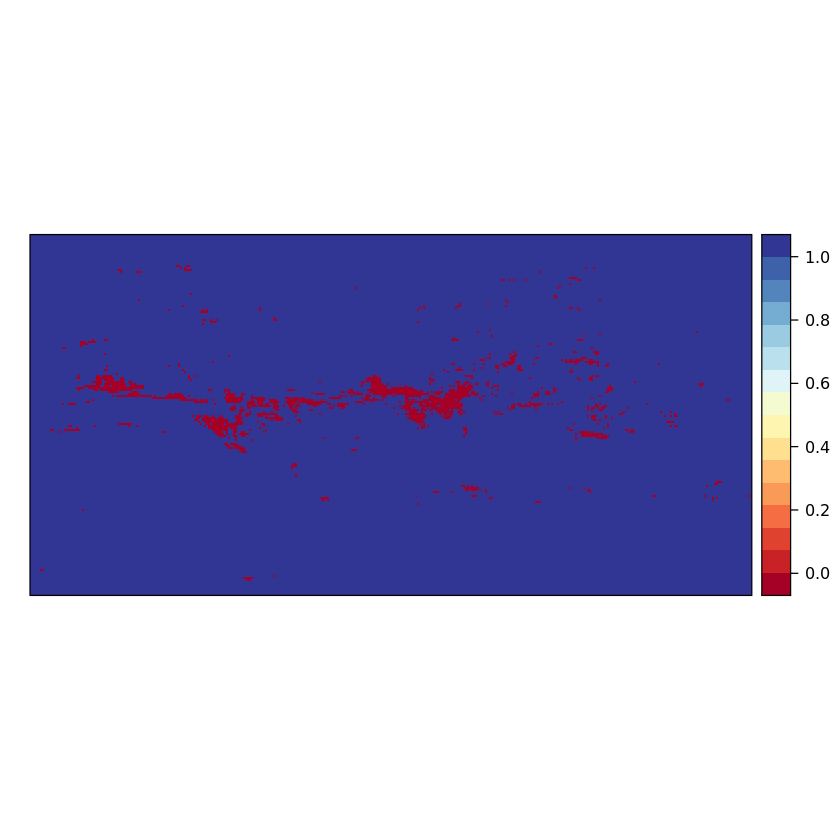

In [24]:
advanced2 <- binaryGrid(advanced2.aux, condition = "GT", threshold = 0)
spatialPlot(advanced2)


We can now create the hatches for the two components (`advanced1` and `advanced2`) of the advanced hatching method. For the second component, we opted for using crosses to obscure the map. To do this, we simply apply again the `map.hatching` function, but using different angles (`angle = "45"` and `angle = "-45"`) each time.

In [ ]:
my.hatching <- function(grid, angle) map.hatching(grid, threshold = 0.8, angle = angle,
                                       condition = "LT", density = 4,  lwd = 0.6,
                                       upscaling.aggr.fun = list(FUN = mean))
advanced1.hatch <- my.hatching(climatology(advanced1), "-45")
advanced2.hatch <- my.hatching(climatology(advanced2),  "45")
advanced2.hatch.bis <- my.hatching(climatology(advanced2), "-45")

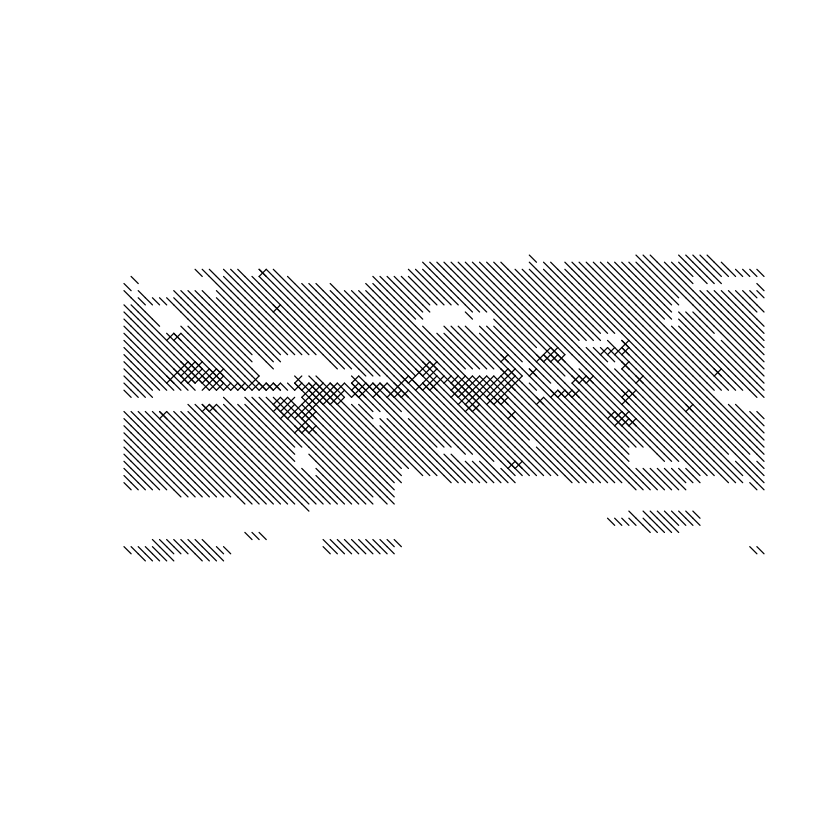

In [26]:
plot(advanced1.hatch[[2]])
plot(advanced2.hatch[[2]], add = TRUE)
plot(advanced2.hatch.bis[[2]], add = TRUE)

We can overlay the hatching on the relative delta to produce the final figure (the hatches are passed to argument `sp.layout`)

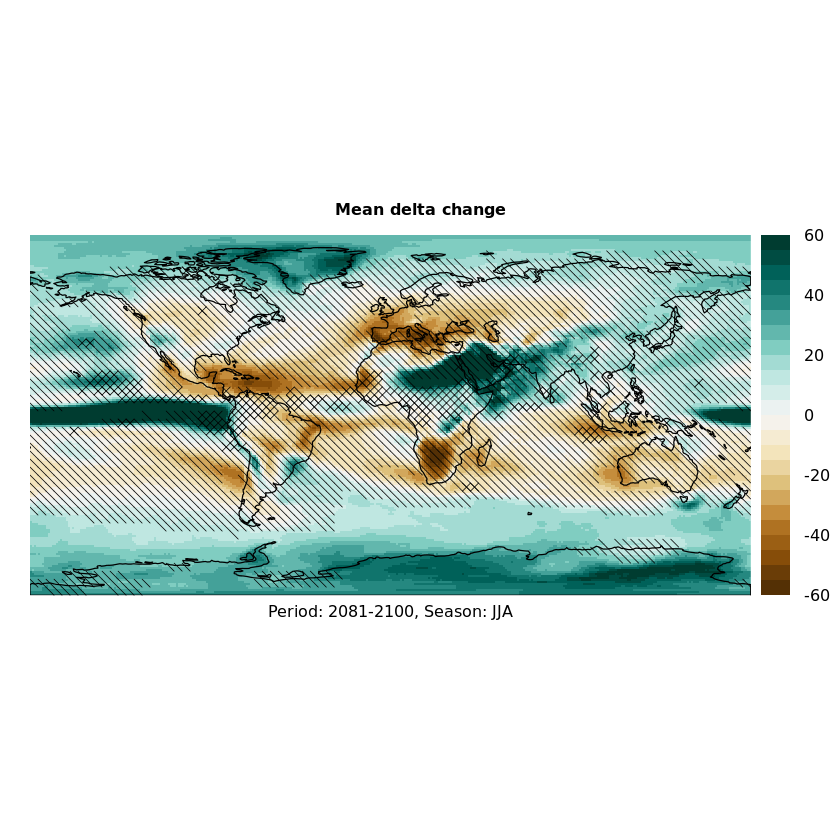

In [27]:
pl.advanced <- spatialPlot(rel.delta, 
            color.theme = "BrBG", 
            at = seq(-60, 60, 5), 
            set.max = 60, set.min = -60,
            backdrop.theme = "coastline",
            main = list("Mean delta change", cex = 0.8),
            xlab = list("Period: 2081-2100, Season: JJA", cex = 0.8),
            sp.layout = list(advanced1.hatch, advanced2.hatch, advanced2.hatch.bis),
            par.settings = list(axis.line = list(col = 'transparent')))
pl.advanced

We could also add the hatching to the ensemble mean of the absolute deltas (instead of the relative ones) just replacing in the above code the first line by:
```R
pl <- spatialPlot(ensemble.mean(delta), ...
```

### Session Information

In [28]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.17.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=en_US.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=en_US.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=en_US.UTF-8          LC_NAME=en_US.UTF-8          
 [9] LC_ADDRESS=en_US.UTF-8        LC_TELEPHONE=en_US.UTF-8     
[11] LC_MEASUREMENT=en_US.UTF-8    LC_IDENTIFICATION=en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] sp_1.4-5            visualizeR_1.6.1    transformeR_2.1.3  
[4] loadeR_1.7.1        climate4R.UDG_0.2.3 loadeR.java_1.1.1  
[7] rJava_1.0-4        

loaded via a namespace (and not attached):
 [1] viridis_0.6.1           maps_3.3.0              jsonlite_1.7.2         
 [4] v

### References

```{bibliography}
:filter: docname in docnames
```

<script src="https://utteranc.es/client.js"
        repo="PhantomAurelia/Atlas"
        issue-term="pathname"
        theme="preferred-color-scheme"
        crossorigin="anonymous"
        async>
</script>